

<center><table>
<tr>

<th> <img src= "INL1.png",align="middle",style="width: 10000px;"/> </th>
</tr>
<tr>
<th> <img src="PennNucDataCenter.jpeg"  ,align="middle", style="width: 500px;"/> </th>
</tr>
<center><table>

# <center>Nuclear-Powered Data Centers Economic Optimization Strategy</center>

#### Expected Outcome
- A journal paper evaluating <u>the economic threshold points</u> identifying the conditions under which user requirements would be better suited by a large, small, or micro-reactor. The use case will be focused on data centers and will provide INL with the credential to stake a claim as a leader in nuclear for data center research.

- With a framework on hand, the lab could then leverage its expertise to offer advisory support for the various data centers considering nuclear energy. Further, with interest growing in this area, it is possible that DOE-NE would sponsor research on coupling nuclear reactors with data centers. INL would be well positioned to lead such R&D activities.

#### Activity
- A framework is proposed to evaluate the **economic tradeoff** between large, small, and micro-reactors. 
- The intent is to map out ‘threshold values’ under a given set of requirements 
  - energy demand size
  - reliability 
  
- The framework would parametrize a set of important economic variables to quantifiably differentiate the different reactor classes. 
  - nuclear capacity
  - diseconomies of scale, 
   - economies of mass production, 
   - speed of deployment, 
   - downtime intervals  



### Required Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src import *


/tmp/ipykernel_508253/2480814995.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Lets start with the cost and LR

In [2]:

# There is uncertainty about the cost of Vogtle but if we use the ref from the ANS website:
# https://www.ans.org/news/article-3949/vogtle-project-update-cost-likely-to-top-30-billion/
# the total cost is 30.34 billions
vog_project_cost_tot = 30.34 * 1000000000 # both unit 3 and unit 3

vogtle3_power = 1117 #MWe from the Georgia power company application to adjust rates.
vogtle4_power = 1117 #MWe

# divide by vog3 and vog 4 because this is the total cost of both
large_cost_per_kw = (vog_project_cost_tot /(vogtle3_power+ vogtle4_power ))/1000

large_cost_should_be_tot =0.5*(8.3+9.2) * 1000000000  #the median LPSR total installed cost range was $8.3–9.2B: https://www.sciencedirect.com/science/article/pii/S0029549323001541

# divide by vog3 only because this is the cost of one reactor only
large_cost_should_be_per_kw = (large_cost_should_be_tot /(vogtle3_power ))/1000

print("The Vogtle cost (2023 USD/kW) is : ", int(large_cost_per_kw ) )
print("The Vogtle (should be) cost (2023 USD/kW) is : ", int(large_cost_should_be_per_kw ) )


# learning rates
# These are the reasonable min and max values (for plotting and calculating but not the expected ones) 
lr_min = 0
lr_max = 0.3
lr_interval = 0.001



# These are the learning rates for the small reactors
# For the learning rate, I used the bounds from this study: https://thebreakthrough.imgix.net/Advancing-Nuclear-Energy_v3-compressed.pdf
# for large reactors: LR between 5 and 10%
large_lr_expected_lo = 0.05
large_lr_expected_hi = 0.1

# for smaller reactors
small_lr_expected_lo = 0.05
small_lr_expected_hi = 0.15


#economies of scale exponents
n_expo_min = 0.2
n_expo_max = 0.75


# power list to consider
pwr_list = [500 ,   300,  100, 50, 10, 5, 1]

# According to the GAIN sheet: the TCI of the SMR ranges between  $13,518 and 	 $5,898 
SMR_min_TCI   = 5898 
SMR_large_TCI = 13518

The Vogtle cost (2023 USD/kW) is :  13581
The Vogtle (should be) cost (2023 USD/kW) is :  7833


Learning rate Tipping Point

In [ ]:
ref_large_reactor_cost_per_kw = large_cost_should_be_per_kw

demand = 500 # MW

num_large_reactors =  int(np.ceil(demand/vogtle3_power ))

min_cost_small = large_cost_should_be_per_kw
max_cost_small = 10*large_cost_should_be_per_kw
num_cost =  50

fig = plt.figure(figsize=(16, 6))

for power in pwr_list:
    print("power (MW) = ", power)
    
    num_small_reactors =  int(np.ceil(demand/power))

    for ref_large_reactor_lr in [large_lr_expected_lo , large_lr_expected_hi]:
        tipping_lr_list = []
        small_reactor_cost_list = []
        for small_reactor_cost in np.linspace(min_cost_small , max_cost_small ,num_cost):
            tipping_lr = calculate_tipping_LR(lr_min, lr_max, lr_interval, small_reactor_cost, num_small_reactors ,num_large_reactors ,  ref_large_reactor_lr, large_cost_should_be_per_kw )
            try:
                float(tipping_lr)
                small_reactor_cost_list.append(small_reactor_cost)
                tipping_lr_list.append(tipping_lr)

            except:
                ... 
        if ref_large_reactor_lr ==   large_lr_expected_lo:
            tipping_lr_list_0 = tipping_lr_list
        elif ref_large_reactor_lr  ==   large_lr_expected_hi:
            tipping_lr_list_1 = tipping_lr_list
            
    # min list length 
    mi = min(len(tipping_lr_list_0), len(tipping_lr_list_1))  
      
      
                
    plt.fill_between(np.array(small_reactor_cost_list[:mi])/large_cost_should_be_per_kw, tipping_lr_list_0[:mi], tipping_lr_list_1[:mi], alpha=0.25)  
    avg_tipping_lr = [np.average(i) for i in zip(tipping_lr_list_0[:mi], tipping_lr_list_1[:mi])]
    plt.plot(np.array(small_reactor_cost_list[:mi])/large_cost_should_be_per_kw, avg_tipping_lr, label = f"Power = {int(power)} MWe")         
# plt.legend( loc='lower right', fontsize=16, edgecolor='black', fancybox=True)   # bbox_to_anchor=(1.05, 1.0)

plt.grid(which='major', color='grey', linewidth=0.8)
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()

plt.xlabel('Economies of Scale Penalty', fontsize=16) 
plt.ylabel('Learning Rate Crossover Point', fontsize=16)  

plt.ylim(0, 0.15 )
plt.xlim(1, 3.5)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.title(f' Demand = {demand } MWe \n', fontsize=16) 

plt.show()     
# plt.plot()

# lets consider the learning rate as uncertainty and the demand as the x axis

Power = 10 MW and the Demand is 500.0 MW  and the cost crossover points are : 1.250836120401337 and 1.9698996655518393
Power = 10 MW and the Demand is 1000.0 MW  and the cost crossover points are : 1.3177257525083608 and 2.2876254180602
Power = 10 MW and the Demand is 1500.0 MW  and the cost crossover points are : 1.2842809364548493 and 2.454849498327759
Power = 10 MW and the Demand is 2000.0 MW  and the cost crossover points are : 1.3177257525083608 and 2.6220735785953178
Power = 10 MW and the Demand is 2500.0 MW  and the cost crossover points are : 1.2842809364548493 and 2.7056856187290967
Power = 10 MW and the Demand is 3000.0 MW  and the cost crossover points are : 1.3010033444816047 and 2.8227424749163874
Power = 10 MW and the Demand is 3500.0 MW  and the cost crossover points are : 1.2842809364548493 and 2.872909698996655
Power = 10 MW and the Demand is 4000.0 MW  and the cost crossover points are : 1.2842809364548493 and 2.9732441471571907
Power = 10 MW and the Demand is 4500.0 

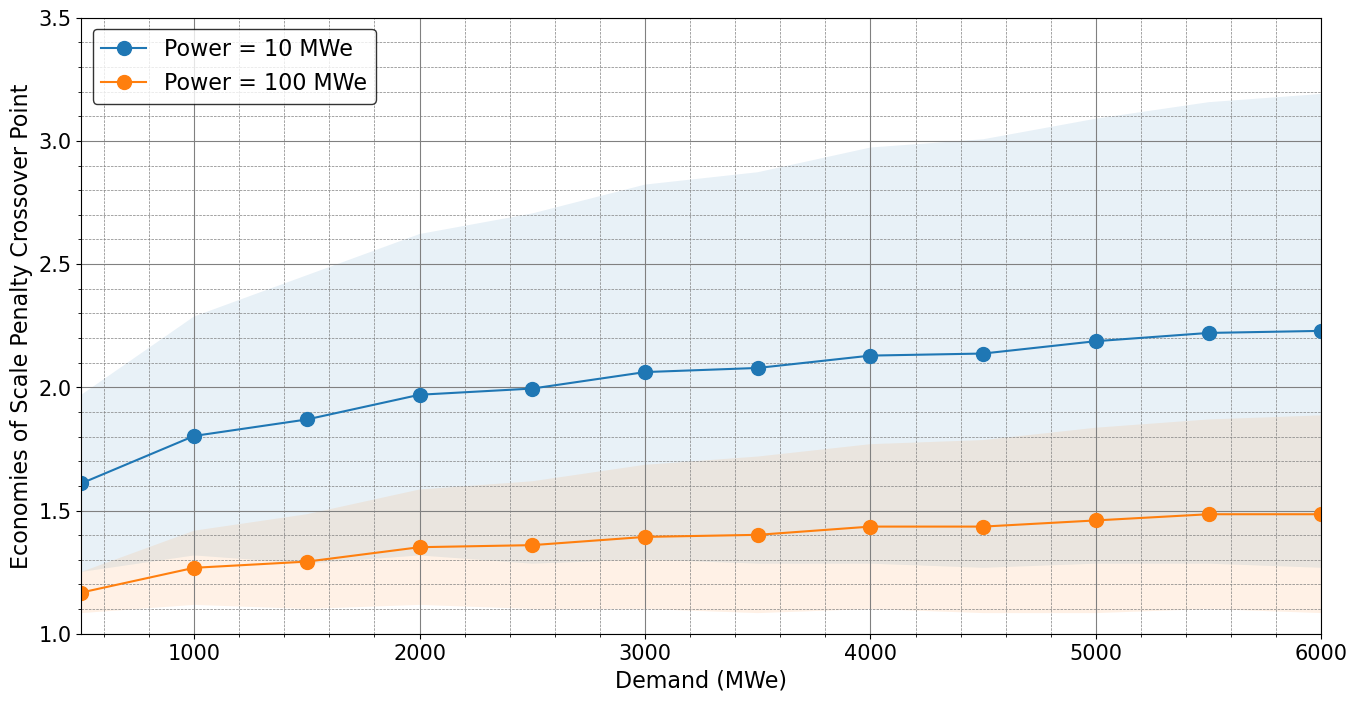

In [3]:
fig = plt.figure(figsize=(16, 8))


ref_large_reactor_cost_per_kw = large_cost_should_be_per_kw

min_cost_small = large_cost_should_be_per_kw
max_cost_small = 6*large_cost_should_be_per_kw
num_cost = 300
LR_interval = 0.02


for power in [10,  100]:# pwr_list:
    breakeven_point_0_list = []
    breakeven_point_1_list = []
    demand_list = []
    
    for demand in   np.linspace(500, 6000, 12):
        
         
        demand_list.append( demand)
        
        num_large_reactors = int(np.ceil(demand/vogtle3_power ))
        num_small_reactors =  int(np.ceil(demand/power))
                
        breakeven_points  = calculate_all_tipping_costs(LR_interval, small_lr_expected_lo, small_lr_expected_hi,\
            large_lr_expected_lo, large_lr_expected_hi, ref_large_reactor_cost_per_kw, num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost)

       
        
        breakeven_point_0 = breakeven_points[0]/ large_cost_should_be_per_kw
        breakeven_point_1 = breakeven_points[1]/ large_cost_should_be_per_kw
        print( f"Power = {power} MW and the Demand is {demand} MW  and the cost crossover points are : {breakeven_point_0} and {breakeven_point_1}" ) 
        breakeven_point_0_list.append(breakeven_point_0)
        breakeven_point_1_list.append(breakeven_point_1) 
    plt.fill_between(demand_list, breakeven_point_0_list, breakeven_point_1_list, alpha=0.1) 

    avg_tipping_cost = [np.average(i) for i in zip(breakeven_point_0_list,  breakeven_point_1_list)]  
    plt.plot(demand_list, avg_tipping_cost , '-o' , markersize = 10 , label = f"Power = {int(power)} MWe") 
plt.legend( loc='upper left', fontsize=16, edgecolor='black', fancybox=True)   # bbox_to_anchor=(1.05, 1.0)


plt.grid(which='major', color='grey', linewidth=0.8)
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()

plt.xlabel('Demand (MWe)', fontsize=16) 
plt.ylabel('Economies of Scale Penalty Crossover Point', fontsize=16)  

plt.ylim(1,3.5 )
plt.xlim(demand_list[0], demand_list[-1])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# plt.title(f' Demand = {demand } MWe \n', fontsize=16) 

plt.show()

# power on the x-axis

In [ ]:
demand = 2000
for power in np.linspace(1, 500,  50):
     num_large_reactors = int(np.ceil(demand/vogtle3_power ))
    num_small_reactors =  int(np.ceil(demand/power))
    breakeven_points  = calculate_all_tipping_costs(lr_interval, small_lr_expected_lo, small_lr_expected_hi,\
        large_lr_expected_lo, large_lr_expected_hi, ref_large_reactor_cost_per_kw, num_large_reactors,  num_small_reactors, cost_lo, cost_hi, num_cost)

In [ ]:
# https://world-nuclear-news.org/Articles/AP1000-remains-attractive-option-for-US-market-say#:~:text=MIT%20estimates%20the%20overnight%20capital,series%2C%20based%20on%202018%20dollars.


fuel_lifetime_0 = 2*12*30 # days
refueling_period_0 = 30 # days
levelization_period_0 = 30*365 # days
demand_0 = 1500

overall_capacity_factor_criteria = 0.99
min_capacity_factor_criteria = 0.9

# ref large reactor
cost_large = 4300  # vogtle_should_be_cost $/kWe (CHECK THIS!!!)
power_large = 1100 # Vogtle unit 3
LR_Large = 0.061 # from PWR (76% cost ratio for the 20th reactor) ... 8% in the GAIN report

# small reactor

lr_small_min = 0
lr_small_max = 0.2
lr_small_interval = 0.01

num_LR_small = 1+abs(int(np.ceil( (lr_small_min - lr_small_max)/ lr_small_interval) ) ) 

min_cost_small = cost_large 
max_cost_small = 50*cost_large 
cost_interval_small = 20 # 50 dollars
num_cost_small = int(np.ceil(1 + abs(max_cost_small  - min_cost_small )/ cost_interval_small  ) )


# #Step1 : calculate cost of the large ractor
num_reactors_needed_large = num_reactors_needed_for_capacity_factor(overall_capacity_factor_criteria, min_capacity_factor_criteria, fuel_lifetime_0, refueling_period_0, power_large, levelization_period_0, demand_0)

final_cost_large = calculate_final_cost_due_to_learning_rate(cost_large , LR_Large, int(num_reactors_needed_large)  )

final_cost_per_demand_large = final_cost_large * (num_reactors_needed_large*power_large/demand_0)

power_list = [300, 100 ,50 ,20, 10, 5, 1]

# # Step2: calculate cost of small reactor that matches the large reactor
lr_small_save_tot = []
tipping_cost_save_tot = []
for power_small in power_list:
    
    num_reactors_needed_small = num_reactors_needed_for_capacity_factor(overall_capacity_factor_criteria, min_capacity_factor_criteria, fuel_lifetime_0, refueling_period_0, power_small, levelization_period_0, demand_0)

    lr_small_save = []
    tipping_cost_save = []

    for lr_small in np.linspace(lr_small_min, lr_small_max , num_LR_small ): 
          
        
        for cost_small in np.linspace(max_cost_small, min_cost_small, num_cost_small):
        
            final_cost_small = calculate_final_cost_due_to_learning_rate(cost_small , lr_small, int(num_reactors_needed_small)  )
            final_cost_per_demand_small = final_cost_small* (num_reactors_needed_small*power_small/demand_0)
            if final_cost_per_demand_small  <=  final_cost_per_demand_large:
                cost_tipping_point = final_cost_per_demand_small
                tipping_cost_save.append(cost_small)
                lr_small_save.append(lr_small)
                print(power_small, "MWe", "LR = ", lr_small)  
                break
    lr_small_save_tot.append(lr_small_save)
    tipping_cost_save_tot.append( tipping_cost_save)

    # plt.plot(lr_small_save, np.array(tipping_cost_save)/cost_large, '-o' , markersize = 10, label =f'Power = {power_small} MWe')
    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
# plt.grid(which='major', color='grey', linewidth=0.8)
# plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
# plt.minorticks_on()
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)  

# plt.xlabel('Learning Rate',  fontsize=16 )
# plt.ylabel('Small Reactor to Large Reactor \n FOAK Cost (USD/MWe) Ratio \n',  fontsize=14)
# plt.xlim(0.04, 0.2)
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.02))

# plt.show()    

In [ ]:
fig = plt.figure(figsize=(16, 10))

for i in range (len(lr_small_save_tot)):
    plt.plot(lr_small_save_tot[i], np.array(tipping_cost_save_tot[i])/cost_large ,'-o' , markersize = 10, label =f'Power = {power_list [i]} MWe')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


plt.grid(which='major', color='grey', linewidth=0.8)
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)  

plt.xlabel('Learning Rate',  fontsize=16 )
plt.ylabel('Small Reactor to Large Reactor \n FOAK Cost (USD/ MWe) Ratio \n',  fontsize=14)
plt.xlim(0, 0.2)
plt.ylim(1, 15)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.02))

plt.title(f"Cost Tipping Point: Where the total Cost of an SMR/micro reactor ($/demand in MWe) equals the cost of a large reactor : \n Fuel Lifetime = {np.round(fuel_lifetime_0 /30, 1)} months ,   Refueling Period = {refueling_period_0} days ,\
     Levelization Period = {np.round(levelization_period_0/365, 1)} years \n Demand  = {demand_0} MWe , Target Capacity Factor (per day) = {min_capacity_factor_criteria} \n"  , fontsize=16)
plt.show()


In [ ]:
# The mix of reactors
# Excess energy 
# O& M. LCOE 
# same figure with and without capacity factor criteria 
# Energies journal
# Levi: TCI values (construction duration)
# Get the master excel sheets from AAJ

## For a given learning rate how much FOAK penalty can you afford